<a href="https://colab.research.google.com/github/kaindoh/Financial-Inclusion-Data-Analysis/blob/master/Individuals_are_most_likely_to_have_or_use_a_bank_account.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraries**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# **Loading Files**

In [0]:
df=pd.read_csv("Financial Dataset - 1.csv")
descr=pd.read_csv("VariableDefinitions.csv")

In [6]:
#Displaying the description
descr

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


#**Understanding the Dataset**

In [7]:
#Display the the dataset
df.sample(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
14685,Rwanda,2016,uniqueid_8626,No,Rural,Yes,5.0,21.0,Female,Spouse,Married/Living together,Primary education,Informally employed
9237,Rwanda,2016,uniqueid_3170,No,Rural,Yes,5.0,48.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
14174,Rwanda,2016,uniqueid_8107,No,Rural,Yes,4.0,29.0,Male,Head of Household,Married/Living together,Tertiary education,Self employed
9638,Rwanda,2016,uniqueid_3571,No,Rural,Yes,3.0,33.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
1361,Kenya,2018,uniqueid_1362,No,Rural,No,1.0,70.0,Female,Head of Household,Widowed,No formal education,Other Income


In [8]:
#The review of dataset
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


(23524, 13)

In [9]:
#Statistics review
df.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# **Creating A Hypothesis**

Ho: An Individual has a bank account
H1:An individual has no bank account

# **Cleaning dataset**

In [10]:
#knowing the column names
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
#Getting the column names uniform
df.columns=df.columns.str.lower().str.replace(' ','_')

In [12]:
#display of the uniform columns
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [13]:
#checking for missing values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [14]:
#checking the data types for various columns
df.dtypes


country                    object
year                        int64
uniqueid                   object
has_a_bank_account         object
type_of_location           object
cell_phone_access          object
household_size            float64
respondent_age            float64
gender_of_respondent       object
the_relathip_with_head     object
marital_status             object
level_of_educuation        object
type_of_job                object
dtype: object

In [0]:
#Dropping null values since tey are not as many
df.dropna(inplace=True)

In [16]:
#confirming whether the null values are dropped
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

In [17]:
#checking for duplcates
df[df.duplicated()]

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job


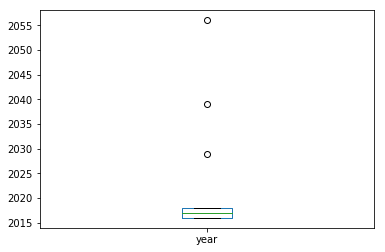

In [18]:
#checking for outliers
df['year'].plot(kind='box')

In [19]:
#Getting unique years
df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [0]:
#Removing 2029 2056 and 2038
year_outliers=df[df.year>2019].index
df.drop(year_outliers,inplace=True)

In [21]:
#Displaying the remaining years
df.year.unique()

array([2018, 2016, 2017])

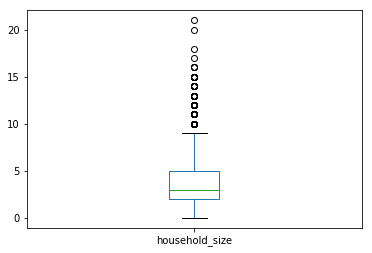

In [22]:
#checking for outliers in household_size
df.household_size.plot(kind='box')

In [23]:
#Getting unique values of household_size
df.household_size.unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

I will not drop household_size outliers because a maximum of 21 people in one house is reasonable

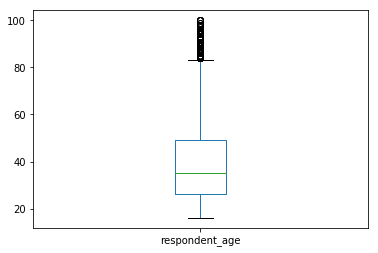

In [24]:
#checking for outliers in respondent_age
df.respondent_age.plot(kind='box')

In [25]:
#Getting unique values of respondent_age
df.respondent_age.unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

I will not drop respondent_age outliers because a maximum of 100 is also reasonable

# **Statistical Overview**

In [26]:
#identifying whether data is correlated
df.corr()

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


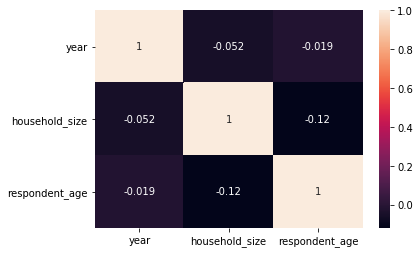

In [27]:
#creating a heatmap of the correlated values
sns.heatmap(df.corr(),annot=True)

This shows that household size respondent_age and year are inversely and weakly correlated

In [28]:
df.skew()

year              0.042833
household_size    0.974183
respondent_age    0.840615
dtype: float64


household_size and respondent_age are skewed to the right


In [29]:
#Finding the kurtosis
df.kurt()

year             -1.611829
household_size    1.153836
respondent_age    0.098268
dtype: float64

year is platykurtic
household_size is leptokurtic
respondent_age is mesokurtic

In [30]:
#Finding the standard deviation
df.std()

year               0.849136
household_size     2.281275
respondent_age    16.519905
dtype: float64

respondent_age has the the greatest variance meaning the values of age are so far from the mean

In [31]:
df.describe()

,year,household_size,respondent_age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


# Visualization of The Data

In [32]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [33]:
df.the_relathip_with_head.unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [34]:
df.level_of_educuation.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [35]:
df.type_of_location.unique()

array(['Rural', 'Urban'], dtype=object)

In [36]:
location=df.groupby('type_of_location')['type_of_location'].count()
location

type_of_location
Rural    14263
Urban     9077
Name: type_of_location, dtype: int64

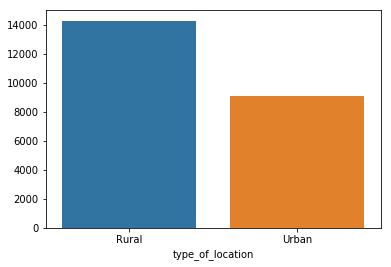

In [37]:
#potting a bar plots on location
sns.barplot(location.index,location.values)

In [0]:
bank=df.groupby('has_a_bank_account')['has_a_bank_account'].count()

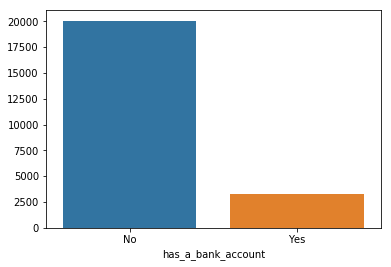

In [39]:
#plotting a bar plot
sns.barplot(bank.index,bank.values)

In [40]:
df.cell_phone_access.unique()

array(['Yes', 'No'], dtype=object)

In [41]:
cell_phone_access=df.groupby('cell_phone_access')['cell_phone_access'].count()
cell_phone_access


cell_phone_access
No      6009
Yes    17331
Name: cell_phone_access, dtype: int64

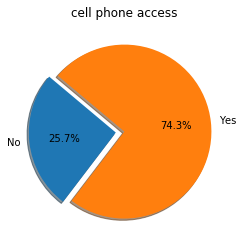

In [42]:
#plotting a pie chart
explode=[0.1,0]
plt.pie(cell_phone_access,labels=cell_phone_access.index,autopct="%1.1f%%",shadow=True,startangle=140,explode=explode)
plt.title("cell phone access")
plt.show()

In [43]:
gender=df.groupby('gender_of_respondent')['gender_of_respondent'].count()
gender

gender_of_respondent
Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64

Text(0.5, 1.0, 'Gender')

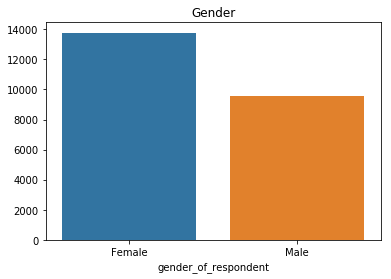

In [44]:
#plotting bar plots
sns.barplot(gender.index,gender.values)
plt.title("Gender")

In [45]:
df.type_of_job.unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [46]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
jobs= df.groupby('type_of_job')['type_of_job'].count().sort_values(ascending=False)

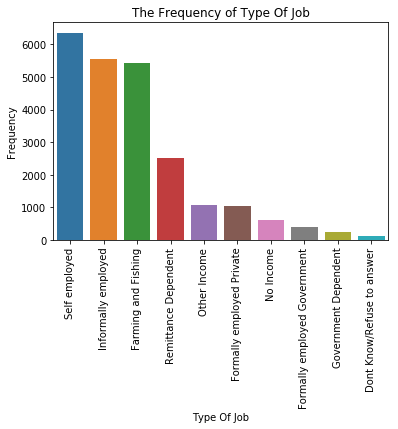

In [48]:
#plotting bar plots
sns.barplot(jobs.index,jobs.values)
plt.xticks(rotation=90)
plt.xlabel("Type Of Job")
plt.ylabel("Frequency")
plt.title("The Frequency of Type Of Job")
plt.show()

In [49]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [50]:
df.marital_status.unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [51]:
marital_status= df.groupby('marital_status')['marital_status'].count().sort_values(ascending=False)
marital_status

marital_status
Married/Living together    10698
Single/Never Married        7902
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

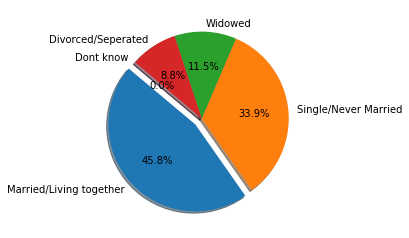

In [52]:
#plotting a pie chart
explode=[0.1,0,0,0,0]
plt.pie(marital_status,labels=marital_status.index,autopct="%1.1f%%",shadow=True,startangle=140,explode=explode)
plt.show()

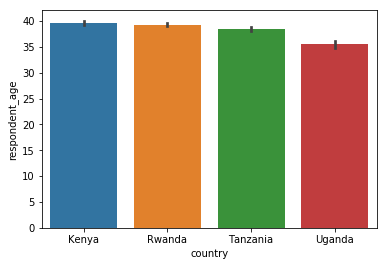

In [53]:
#plotting bar plots
sns.barplot(df.country,df.respondent_age)

In [54]:
household=df.groupby('household_size')['household_size'].count()
household

household_size
0.0       36
1.0     3928
2.0     5072
3.0     3513
4.0     3199
5.0     2716
6.0     2028
7.0     1378
8.0      740
9.0      354
10.0     191
11.0      66
12.0      66
13.0      25
14.0       9
15.0      11
16.0       4
17.0       1
18.0       1
20.0       1
21.0       1
Name: household_size, dtype: int64

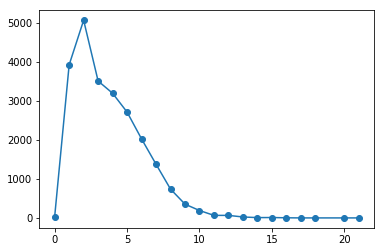

In [55]:
#plotting scatter and lineplot
plt.scatter(household.index,household.values)
plt.plot(household.index,household.values)

It is evident that 5 is the common number of household size
Household size is normally distributed as is skewed to the right

In [56]:
respondent_age=df.groupby('respondent_age')['respondent_age'].count()
respondent_age

respondent_age
16.0      459
17.0      474
18.0      583
19.0      466
20.0      622
21.0      469
22.0      560
23.0      580
24.0      558
25.0      785
26.0      611
27.0      566
28.0      742
29.0      514
30.0     1043
31.0      462
32.0      707
33.0      526
34.0      515
35.0      831
36.0      456
37.0      432
38.0      551
39.0      370
40.0      682
41.0      314
42.0      444
43.0      368
44.0      252
45.0      561
         ... 
71.0       94
72.0       97
73.0       90
74.0       62
75.0      148
76.0       72
77.0       56
78.0       82
79.0       57
80.0      124
81.0       24
82.0       40
83.0       33
84.0       20
85.0       55
86.0       25
87.0       15
88.0       24
89.0       16
90.0       28
91.0        5
92.0        7
93.0        4
94.0        5
95.0       18
96.0        3
97.0        1
98.0        6
99.0        2
100.0       5
Name: respondent_age, Length: 85, dtype: int64

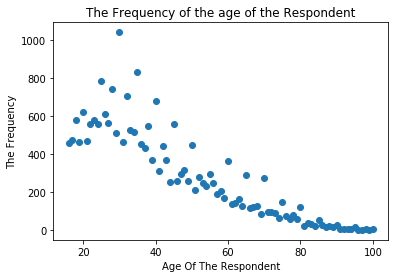

In [57]:
#plotting scatter plot
plt.scatter(respondent_age.index,respondent_age.values)
plt.xlabel("Age Of The Respondent")
plt.ylabel("The Frequency")
plt.title("The Frequency of the age of the Respondent")
plt.show()


The frequency of age is inversely correlated to the age  of the respondent 

# **Trying Different Models**

# 1.Principle Component Analysis(PCA)

In [58]:
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
df.drop('uniqueid',axis=1,inplace=True)

In [60]:
df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
x=df.drop('has_a_bank_account',1)
y=df['has_a_bank_account']

In [62]:
x.head()

,country,year,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [63]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: has_a_bank_account, dtype: object

In [0]:
x=pd.get_dummies(x)

In [0]:
y=pd.get_dummies(y)

In [66]:
x.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relathip_with_head_Child,the_relathip_with_head_Head of Household,the_relathip_with_head_Other non-relatives,the_relathip_with_head_Other relative,the_relathip_with_head_Parent,the_relathip_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_6,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [67]:
y.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [0]:
#splitting dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [0]:
#Normalization
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [0]:
#Applying PCA
pca=PCA()
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [0]:
#Explained Variance Ratio
explained_variance=pca.explained_variance_ratio_
explained_variance

array([1.01711630e-01, 7.25378488e-02, 6.97245816e-02, 6.24751896e-02,
       5.16625861e-02, 4.62446560e-02, 4.01541854e-02, 3.56443263e-02,
       3.48771440e-02, 3.11665118e-02, 2.97509140e-02, 2.71011249e-02,
       2.62719478e-02, 2.52395328e-02, 2.50320421e-02, 2.47680305e-02,
       2.46704336e-02, 2.42959986e-02, 2.41589570e-02, 2.39212523e-02,
       2.37282076e-02, 2.32792357e-02, 2.20882579e-02, 2.11141236e-02,
       1.97155548e-02, 1.92430265e-02, 1.54275762e-02, 1.32384154e-02,
       1.14065685e-02, 1.11867261e-02, 9.38057201e-03, 8.78284265e-03,
       1.75914422e-31, 1.75669261e-32, 6.74718296e-33, 3.36769685e-33,
       2.55923183e-33, 2.18011466e-33, 1.82595827e-33, 1.03349241e-33,
       2.75970982e-35])

In [0]:
explained_variance.shape

(41,)

In [0]:
#using first principal
pca=PCA(n_components=1)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


In [0]:
#Training and Making Predictions
Classifier=RandomForestClassifier(max_depth=2,random_state=0)
Classifier.fit(x_train,y_train)

#predicting the test set results
y_pred=Classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
#Perfomance evaluation
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.8646101113967438


In [0]:
#Results with Second principle
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


In [0]:
#Training and Making Predictions
Classifier=RandomForestClassifier(max_depth=2,random_state=0)
Classifier.fit(x_train,y_train)

#predicting the test set results
y_pred=Classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
#Perfomance evaluation
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.8759640102827764


In [0]:
pca=PCA(n_components=3)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

Classifier=RandomForestClassifier(max_depth=2,random_state=0)
Classifier.fit(x_train,y_train)

#predicting the test set results
y_pred=Classifier.predict(x_test)

print('Accuracy',accuracy_score(y_test,y_pred))


Accuracy 0.8650385604113111


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


From above experiment we attained accuracy of
86.46%  on first principle,87.62% on second principle and 86.50% on third principle.
Therefore the second principle achieved the highest accuracy in making predictions

#2.linear Regression

In [0]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [0]:
y=df['has_a_bank_account'].values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

#splitting dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [0]:
#creating and training a model using linear regression
lm =LinearRegression()
results=lm.fit(x_train,y_train)

In [0]:
#Getting the predictins
predictions=lm.predict(x_test)

In [79]:
r2_score(y_test,predictions)

0.2666795017790725

In [81]:
#Getting the coefficients
(lm.coef_, lm.intercept_) 

(array([-5.23807628e+09, -1.20544434e-03,  1.28538643e-03,  3.92855721e+09,
        -6.54759535e+09, -1.30951907e+09,  3.92855721e+09, -2.13191207e-02,
         2.13188823e-02, -3.66876709e-02,  3.66885665e-02, -2.06438691e-02,
         2.06439976e-02, -2.59521089e-02,  5.16724495e-02, -4.66038870e-02,
        -1.96961788e-02, -2.57516259e-03,  4.31549704e-02, -2.12107985e-03,
        -3.19180554e-02,  2.48750787e-02,  2.40657491e-03,  6.75869562e-03,
        -1.10040891e-01, -2.35866927e-01,  3.03534889e-01, -1.88352403e-01,
        -7.01871214e-02,  1.56191248e-01,  1.44723172e-01, -4.95399093e-02,
        -1.06536053e-01,  2.76689067e-01,  1.95416927e-01,  3.41819478e-02,
        -1.17333412e-01, -6.75998330e-02, -8.64866376e-03, -1.20080680e-01,
        -3.65644693e-02]), 10566509375924.39)

In [80]:
#creating OLS model
X2 = sm.add_constant(x.values)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     261.3
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        05:52:07   Log-Likelihood:                -4920.3
No. Observations:               23340   AIC:                             9907.
Df Residuals:                   23307   BIC:                         1.017e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.5e-05   4.02e-06      3.730      0.0

Most intercept are less than significance level 0.05 hence the hypothesis is statistically significant

0.2667 approximation is not a very good fit hence linear reggression is not an appropriate model for this dataset

# 3.Linear Discriminant Analysis

In [72]:
#creating the predicted variable
y=df['has_a_bank_account'].values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

#splitting dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


#Normalization
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

lda=LDA(n_components=1)
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

#Training and Making Predictions
Classifier=RandomForestClassifier(max_depth=2,random_state=0)
Classifier.fit(x_train,y_train)

#predicting the test set results
y_pred=Classifier.predict(x_test)




/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
#Testing Accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , str(accuracy_score(y_test, y_pred)))


[[3992   44]
 [ 475  157]]
Accuracy 0.8888174807197944


LDA has the highest accuracy of 88.89% which makes it the best reduction method in my experiment